#### Handling Imbalanced Dataset with Machine Learning

In [ ]:
import pandas as pd
df=pd.read_csv('ais_disabling_events_main_only_imp_col_csv.csv')
df.head()

,vessel_class,gap_hours,iuu_caught,spherical_distances,eez_check,Ocean List New whose false were in OG
0,other,13.016667,0,207.942845,0,atlantic
1,other,13.850000,0,9.704232,0,atlantic
2,other,33.733333,0,10.789069,1,atlantic
3,other,30.650000,0,11.695860,1,atlantic
4,other,50.283333,0,93.113335,1,atlantic


In [ ]:
df.shape

(55141, 6)

In [ ]:
df['iuu_caught'].value_counts()

0    55041
1      100
Name: iuu_caught, dtype: int64

In [ ]:
#### Independent and Dependent Features
X=df.drop("iuu_caught",axis=1)
y=df.iuu_caught

### One Hot Encoding

In [ ]:
print(df['vessel_class'].unique())
print(df['Ocean List New whose false were in OG'].unique())

['other' 'trawlers' 'squid_jigger' 'tuna_purse_seines'
 'drifting_longlines']
['atlantic' 'southern' 'mediterranean' 'arctic' 'pacific' 'indian']


In [ ]:
print(df['vessel_class'].value_counts())
print(df['Ocean List New whose false were in OG'].value_counts())

drifting_longlines    18608
squid_jigger          15965
tuna_purse_seines      8620
trawlers               7865
other                  4083
Name: vessel_class, dtype: int64
pacific          31870
atlantic         16469
indian            6176
arctic             499
southern           116
mediterranean       11
Name: Ocean List New whose false were in OG, dtype: int64


In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['vessel_class', 'Ocean List New whose false were in OG'])
print(one_hot_encoded_data.head())

   gap_hours  iuu_caught  spherical_distances  eez_check  \
0  13.016667           0           207.942845          0   
1  13.850000           0             9.704232          0   
2  33.733333           0            10.789069          1   
3  30.650000           0            11.695860          1   
4  50.283333           0            93.113335          1   

   vessel_class_drifting_longlines  vessel_class_other  \
0                                0                   1   
1                                0                   1   
2                                0                   1   
3                                0                   1   
4                                0                   1   

   vessel_class_squid_jigger  vessel_class_trawlers  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4              

In [ ]:
#### Independent and Dependent Features
X=one_hot_encoded_data.drop("iuu_caught",axis=1)
y=one_hot_encoded_data.iuu_caught

#### SMOTETomek

In [ ]:
y.value_counts()

0    55041
1      100
Name: iuu_caught, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=15, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

# smote = SMOTE(sampling_strategy='minority')
adasyn = ADASYN(sampling_strategy='minority')
X_train, y_train = adasyn.fit_resample(X_train,y_train)

# y_sm.value_counts()

In [ ]:
y_train.value_counts()

0    33024
1    33010
Name: iuu_caught, dtype: int64

In [ ]:
y_test.value_counts()

0    22017
1       40
Name: iuu_caught, dtype: int64

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
# from tensorflow_addons import losses


def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(250, input_dim=14, activation='relu'),
        keras.layers.Dense(200, activation='relu'),
        keras.layers.Dense(150, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=50, verbose=1)
    else:
        model.fit(X_train, y_train, epochs=10, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/50
2064/2064 [==============================] - 6s 3ms/step - loss: 0.7006 - accuracy: 0.7676
Epoch 2/50
2064/2064 [==============================] - 6s 3ms/step - loss: 0.2918 - accuracy: 0.8871
Epoch 3/50
2064/2064 [==============================] - 6s 3ms/step - loss: 0.2559 - accuracy: 0.9025
Epoch 4/50
2064/2064 [==============================] - 6s 3ms/step - loss: 0.2356 - accuracy: 0.9144
Epoch 5/50
2064/2064 [==============================] - 6s 3ms/step - loss: 0.1836 - accuracy: 0.9340
Epoch 6/50
2064/2064 [==============================] - 6s 3ms/step - loss: 0.1669 - accuracy: 0.9412
Epoch 7/50
2064/2064 [==============================] - 6s 3ms/step - loss: 0.1531 - accuracy: 0.9457
Epoch 8/50
2064/2064 [==============================] - 6s 3ms/step - loss: 0.1416 - accuracy: 0.9503
Epoch 9/50
2064/2064 [==============================] - 6s 3ms/step - loss: 0.1230 - accuracy: 0.9577
Epoch 10/50
2064/2064 [==============================] - 6s 3ms/step - loss: 0.119

In [ ]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)


[[21398   619]
 [   25    15]]


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


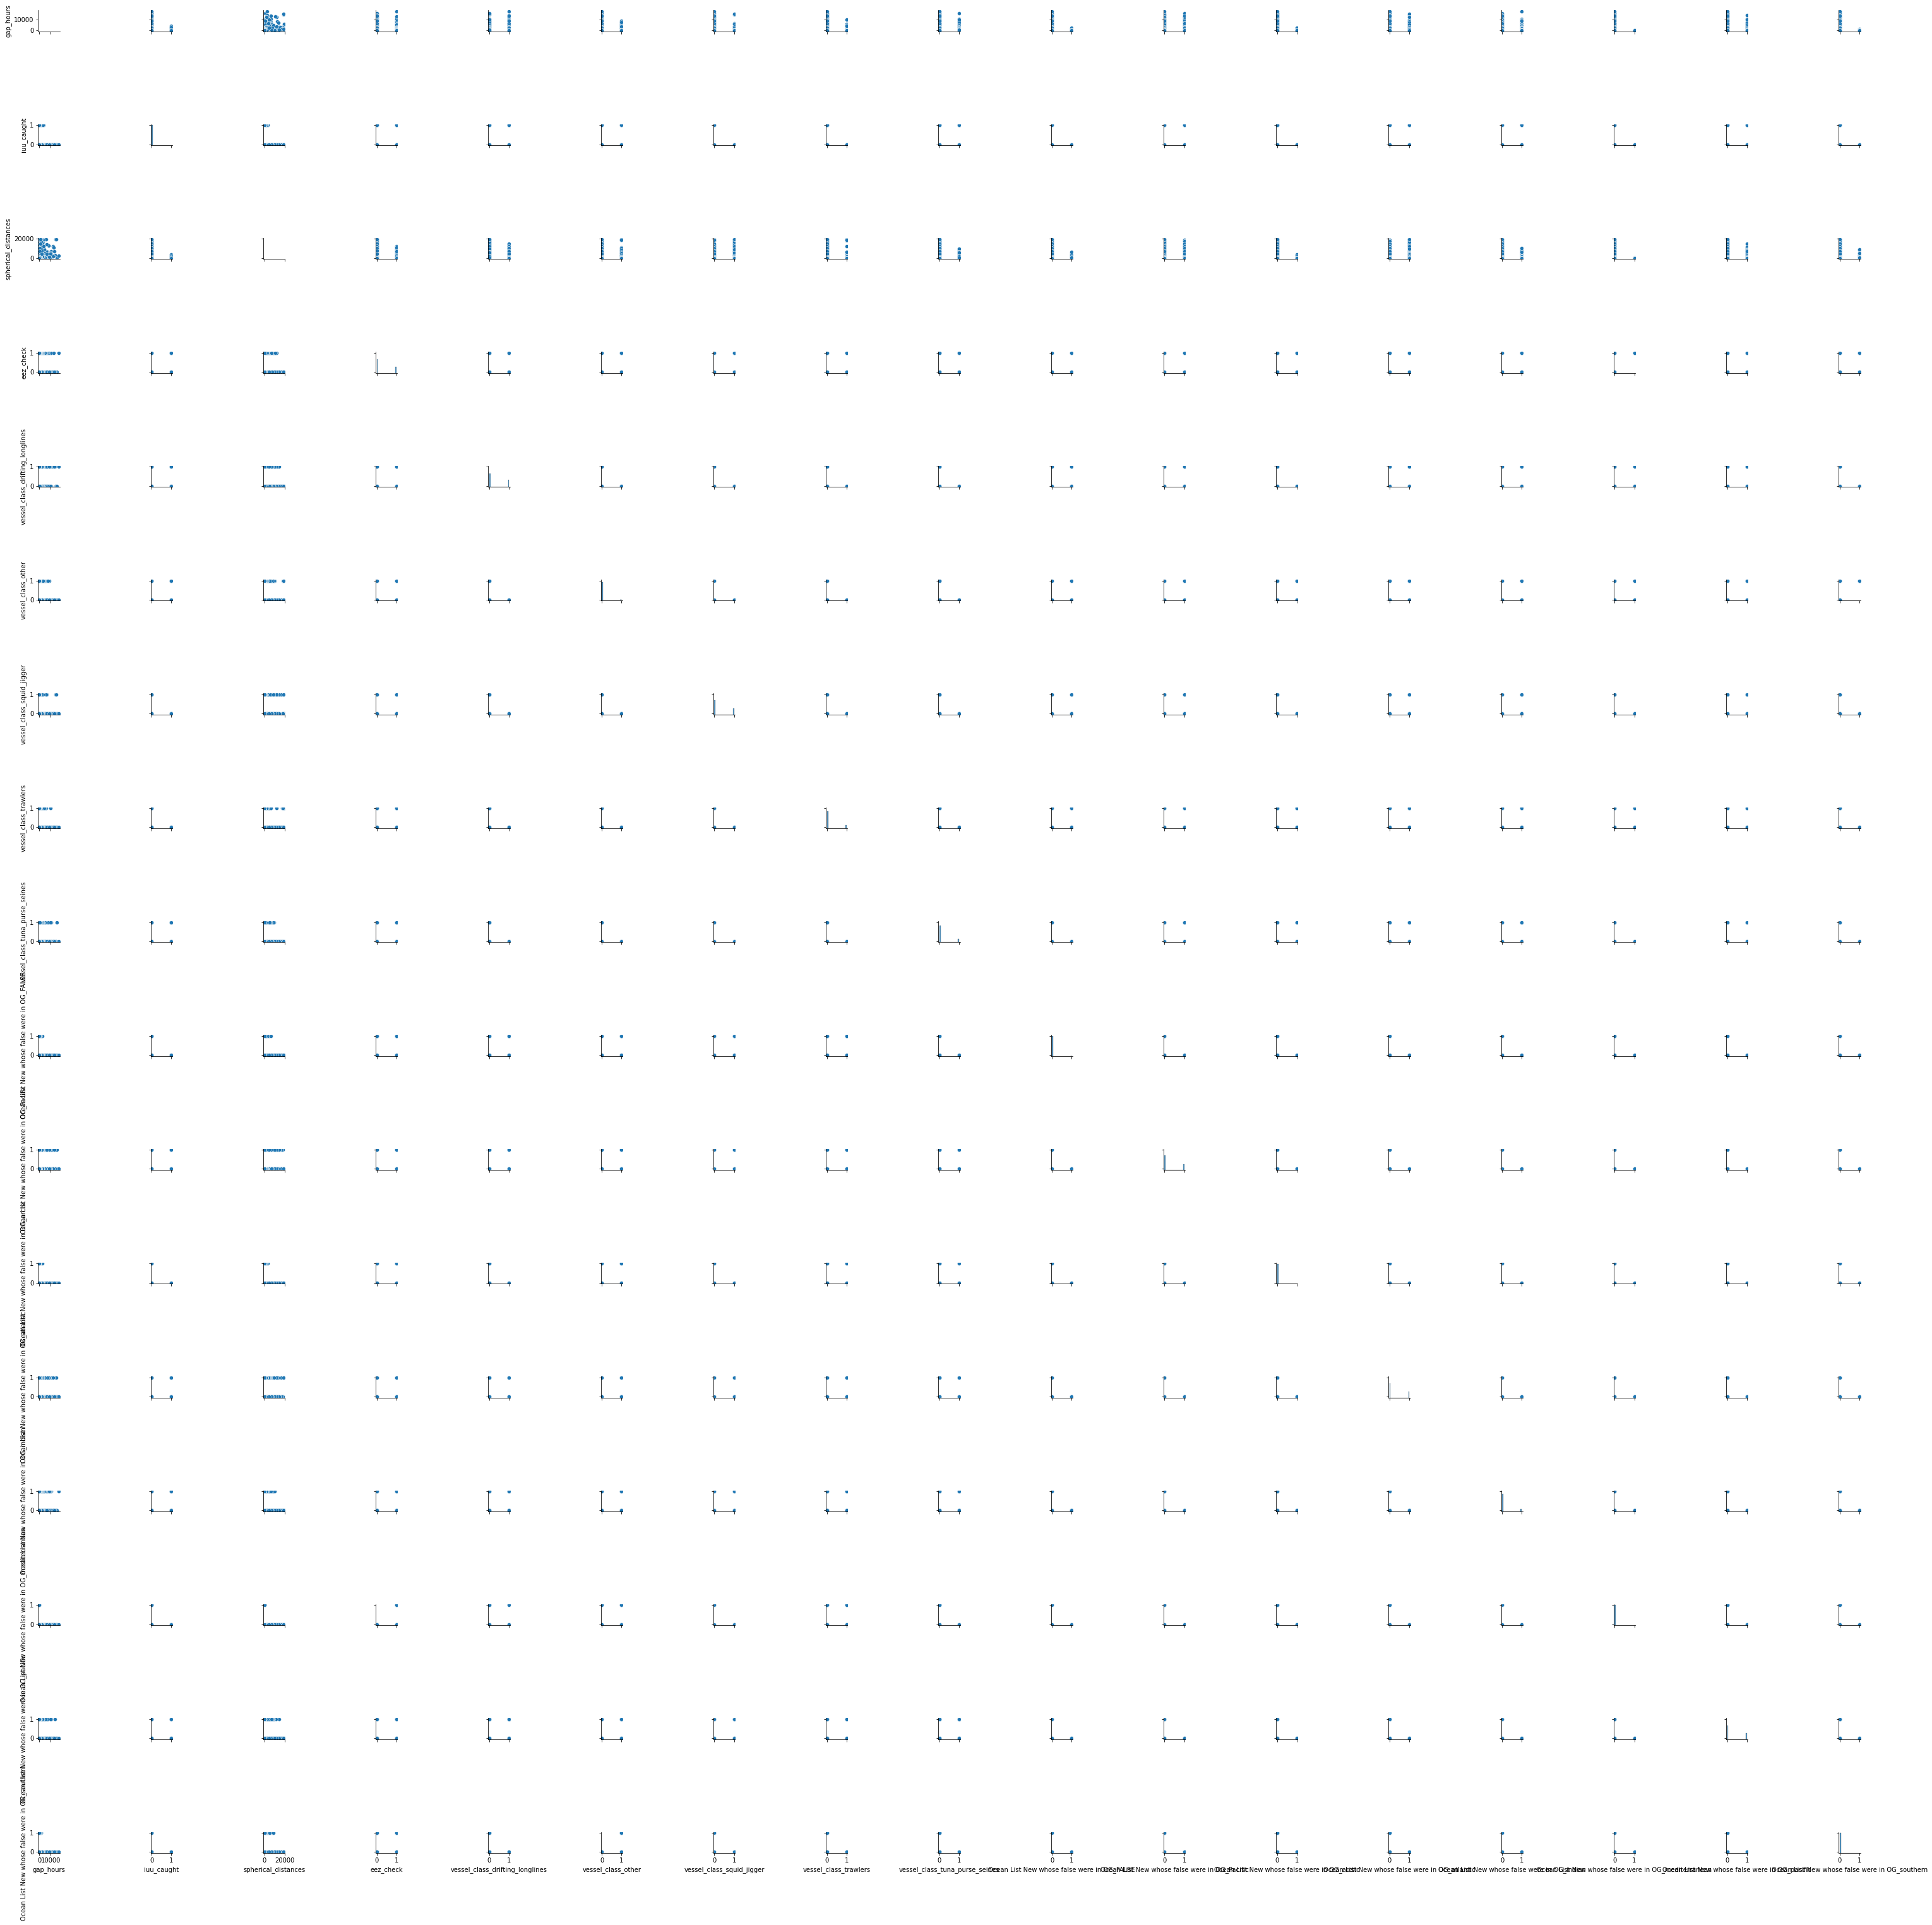

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot matrix
sns.pairplot(one_hot_encoded_data)

# Show the plot
plt.show()